In [1]:
import pandas as pd
import numpy as np
import torch
from torch import Tensor
import seaborn as sns
from matplotlib import pyplot as plt
from utils import distribution_functions
from utils import NNarySearch

### Torch logistic function

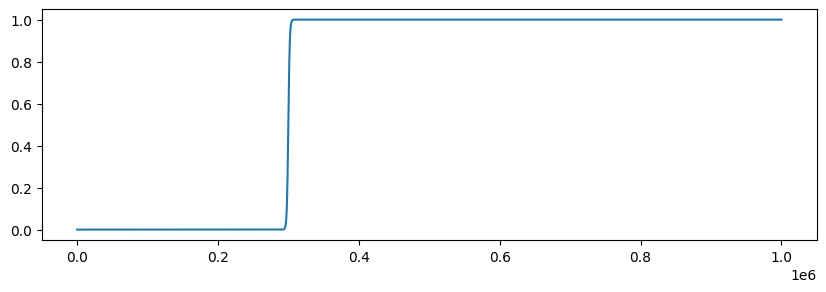

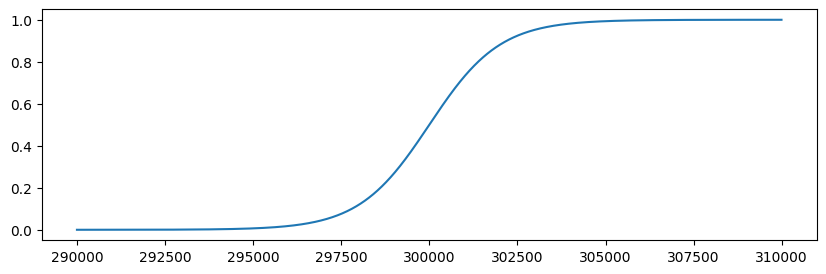

In [2]:
linspace, logistic = distribution_functions.logistic_tensor(3e5, 1e-3, 0, 1e6)


plt.figure(figsize=(10, 3))
sns.lineplot(x=linspace.numpy(), y=logistic.numpy());
plt.figure(figsize=(10, 3))

mask = (linspace > 2.9e5) & (linspace < 3.1e5)
sns.lineplot(x=linspace[mask].numpy(), y=logistic[mask].numpy());

# Binary search simulation

<Axes: >

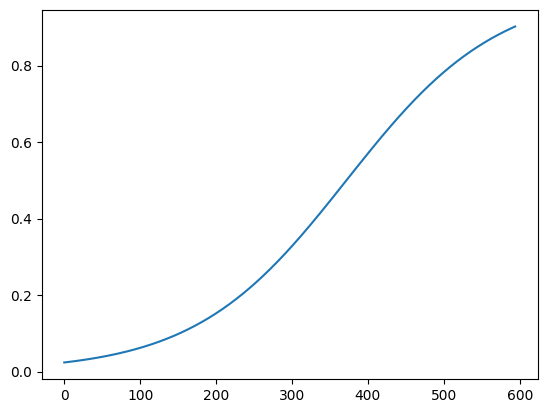

In [3]:
binary = NNarySearch.NNarySearch(n=5, bounds=(0.1, 0.9), split_power=0.2)

res = binary.run_search(logistic)
sns.lineplot(res)


<Axes: xlabel='power', ylabel='splits'>

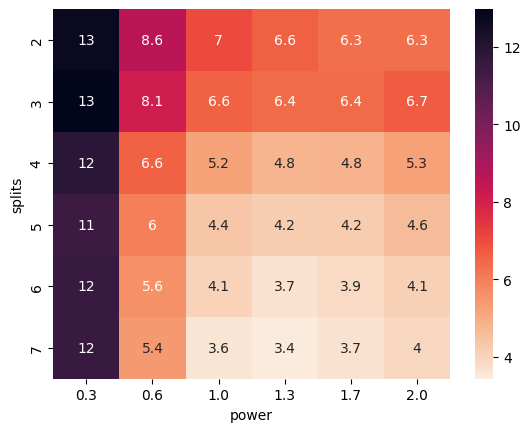

In [11]:

def run_simulations(center_space, power_space, split_space, search_class):
    results = []
    for log_center in center_space:
        linspace, logistic = distribution_functions.logistic_tensor(float(log_center), 1e-3, 0, 1e6)
        for splits in split_space:
            for power in power_space:
                power = round(power, 1)
                search = search_class(splits, split_power=power)
   
                search.run_search(logistic)

                results.append({
                    "log_center": log_center,
                    "splits": splits,
                    "power": power,
                    "value": search.iterations,
                })
    df = pd.DataFrame(results)
    pivot = df.pivot_table(
        index="splits",
        columns="power",
        values="value",
        aggfunc="mean"
    )

    return pivot

            
center_space = np.linspace(1e2, 2e5, 100)
power_space = np.linspace(0.3, 2, 6)
split_space = np.arange(2, 8)

pivot = run_simulations(center_space, power_space, split_space, NNarySearch.NNarySearch)


sns.heatmap(
    pivot, 
    annot=True, 
    cmap=sns.color_palette("rocket_r", as_cmap=True)
)